# Assignment 1: Introduction to Data Science and Python

**Submitted by:** *Neha Devi Shakya 15h, Sarvesh Meenowa 15h*

# 1. Download some data related to GDP per capita and life expectancy. 

### IMPORT LIBRARIES & DATASETS

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # set seaborn theme
sns.set(font_scale = 1.2) # set seaborn font size

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [3]:
# load GDP vs Life Expectancy dataset
df = pd.read_csv("data/life-expectancy-vs-gdp-per-capita.csv")

# get a general look at the data
df.head()

,Entity,Code,Year,Life expectancy,GDP per capita,145446-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.638,1156.0,NaN,7752117.0,NaN
2,Afghanistan,AFG,1951,27.878,1170.0,NaN,7840151.0,NaN
3,Afghanistan,AFG,1952,28.361,1189.0,NaN,7935996.0,NaN
4,Afghanistan,AFG,1953,28.852,1240.0,NaN,8039684.0,NaN


### DATA CLEANING

In [4]:
# check for number of missing values
df.isnull().sum()

Entity                                   0
Code                                  2224
Year                                     0
Life expectancy                      41038
GDP per capita                       40190
145446-annotations                   60045
Population (historical estimates)     4410
Continent                            59781
dtype: int64

In [5]:
# calculate the percentage of missing values
perc_missing = df.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': perc_missing
})
missing_df

,column_name,percent_missing
Entity,Entity,0.000000
Code,Code,3.702594
Year,Year,0.000000
Life expectancy,Life expectancy,68.321513
GDP per capita,GDP per capita,66.909733
145446-annotations,145446-annotations,99.965038
Population (historical estimates),Population (historical estimates),7.341924
Continent,Continent,99.525522


In [6]:
# select required columns
df = df[["Entity", "Code", "Year", "Life expectancy", "GDP per capita", "Population (historical estimates)"]]

In [7]:
# remove rows with missing data for life expectancy and gdp
df_clean = df.dropna(subset = ['Life expectancy', 'GDP per capita'])

In [8]:
# get list of entities in the dataset
df_clean.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel',

In [9]:
# remove where entity is World
df_clean = df_clean[df_clean["Entity"]!="World"]

In [10]:
# Add continent column
# load continent data set
df_continents = pd.read_csv("data/continents-according-to-our-world-in-data.csv")
df_continents.head()

,Entity,Code,Year,Continent
0,Abkhazia,OWID_ABK,2015,Asia
1,Afghanistan,AFG,2015,Asia
2,Akrotiri and Dhekelia,OWID_AKD,2015,Asia
3,Albania,ALB,2015,Europe
4,Algeria,DZA,2015,Africa


In [11]:
# select required columns
df_continents = df_continents[["Code", "Continent"]]
df_continents.head()

,Code,Continent
0,OWID_ABK,Asia
1,AFG,Asia
2,OWID_AKD,Asia
3,ALB,Europe
4,DZA,Africa


In [12]:
# merge gdp vs life expectancy dataset with continent dataset
df_clean = pd.merge(df_clean, df_continents, how="left", on=["Code"])
df_clean

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
0,Afghanistan,AFG,1950,27.638,1156.0000,7752117.0,Asia
1,Afghanistan,AFG,1951,27.878,1170.0000,7840151.0,Asia
2,Afghanistan,AFG,1952,28.361,1189.0000,7935996.0,Asia
3,Afghanistan,AFG,1953,28.852,1240.0000,8039684.0,Asia
4,Afghanistan,AFG,1954,29.350,1245.0000,8151316.0,Asia
...,...,...,...,...,...,...,...
12495,Zimbabwe,ZWE,2014,58.410,1594.0000,13586710.0,Africa
12496,Zimbabwe,ZWE,2015,59.534,1560.0000,13814642.0,Africa
12497,Zimbabwe,ZWE,2016,60.294,1534.0000,14030338.0,Africa
12498,Zimbabwe,ZWE,2017,60.812,1582.3662,14236599.0,Africa


In [13]:
df_clean.isnull().sum()

Entity                                0
Code                                  0
Year                                  0
Life expectancy                       0
GDP per capita                        0
Population (historical estimates)    97
Continent                             0
dtype: int64

### DATA FILTERING

In [14]:
# find amount of data for each year
year_freq = df_clean.groupby(['Year']).count()
year_freq.tail()

,Entity,Code,Life expectancy,GDP per capita,Population (historical estimates),Continent
Year,,,,,,
2014,166,166,166,166,166,166
2015,166,166,166,166,166,166
2016,166,166,166,166,166,166
2017,166,166,166,166,166,166
2018,166,166,166,166,166,166


In [15]:
# get number of maximum data for all years
df_clean["Year"].value_counts().max()

166

In [16]:
# get years with maximum data
years_max = year_freq[year_freq["Entity"] == 166]
years_max

,Entity,Code,Life expectancy,GDP per capita,Population (historical estimates),Continent
Year,,,,,,
1990,166,166,166,166,166,166
1993,166,166,166,166,166,166
1994,166,166,166,166,166,166
1995,166,166,166,166,166,166
1996,166,166,166,166,166,166
1997,166,166,166,166,166,166
1998,166,166,166,166,166,166
1999,166,166,166,166,166,166
2000,166,166,166,166,166,166


In [17]:
# get number of years with maximum data
len(years_max)

27

In [18]:
# select most recent year with the max frequency i.e. 2018
df_2018 = df_clean[df_clean["Year"] == 2018].reset_index(drop = True)
df_2018.head()

,Entity,Code,Year,Life expectancy,GDP per capita,Population (historical estimates),Continent
0,Afghanistan,AFG,2018,64.486,1934.5550,37171922.0,Asia
1,Albania,ALB,2018,78.458,11104.1665,2882735.0,Europe
2,Algeria,DZA,2018,76.693,14228.0250,42228415.0,Africa
3,Angola,AGO,2018,60.782,7771.4418,30809787.0,Africa
4,Argentina,ARG,2018,76.520,18556.3831,44361150.0,South America


## a. Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [1p] 

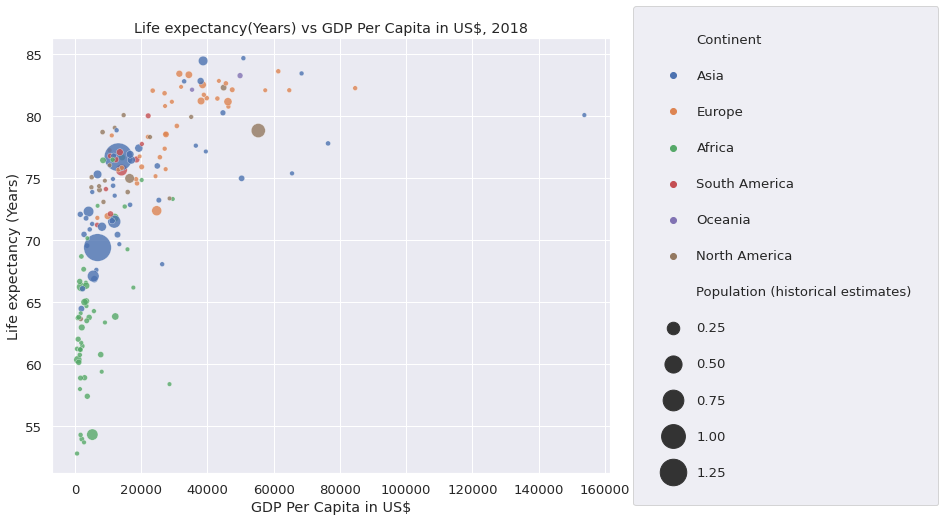

In [19]:
plt.figure(figsize = (10, 8)) # set figure size

# create scatter plot
sns.scatterplot(
    data = df_2018, 
    x = "GDP per capita", 
    y = "Life expectancy", 
    size = "Population (historical estimates)", 
    hue = "Continent", 
    sizes = (20, 800), 
    alpha = 0.8
)

# add legend
plt.legend(
    bbox_to_anchor = (1.03, 0.5), 
    loc = 'center left', 
    borderpad = 2, 
    labelspacing = 1.75
)

# set title
plt.title("Life expectancy(Years) vs GDP Per Capita in US$, 2018")
# set x-axis label
plt.xlabel("GDP Per Capita in US$")
# set y-axis label
plt.ylabel("Life expectancy (Years)")

plt.show()

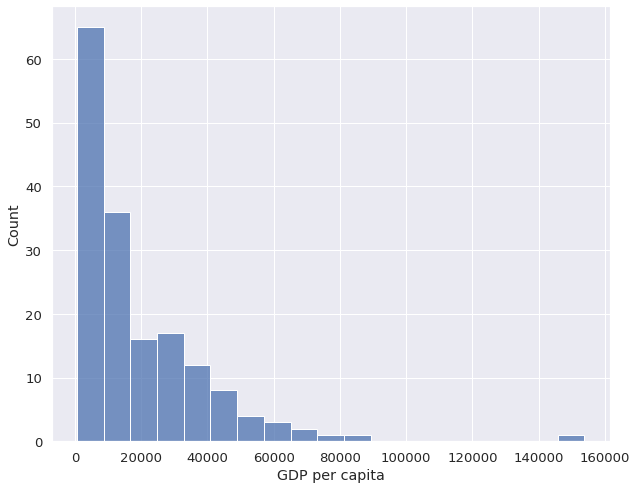

In [20]:
# create histogram to study skewness of the data

# set figure size
plt.figure(figsize = (10, 8))

# create histogram
sns.histplot(data = df_2018, x = "GDP per capita")

plt.show()

> GDP per capita is right skewed, hence we performed a log transformation and also added few labels to get a more interpretable scatterplot.

In [21]:
# get a list of top 3 countries with highest and lowest population to use as plot labels
df_2018_lbl = df_2018.nlargest(3,'Population (historical estimates)')
df_2018_lbl = df_2018_lbl.append(df_2018.nsmallest(3,'Population (historical estimates)'))
df_2018_lbl = df_2018_lbl[["Entity", "Life expectancy", "GDP per capita"]]
df_2018_lbl

,Entity,Life expectancy,GDP per capita
29,China,76.704,13101.7064
67,India,69.416,6806.4986
158,United States,78.851,55334.7394
42,Dominica,74.806,9021.1737
132,Seychelles,73.333,29531.0612
127,Saint Lucia,76.057,10475.3689


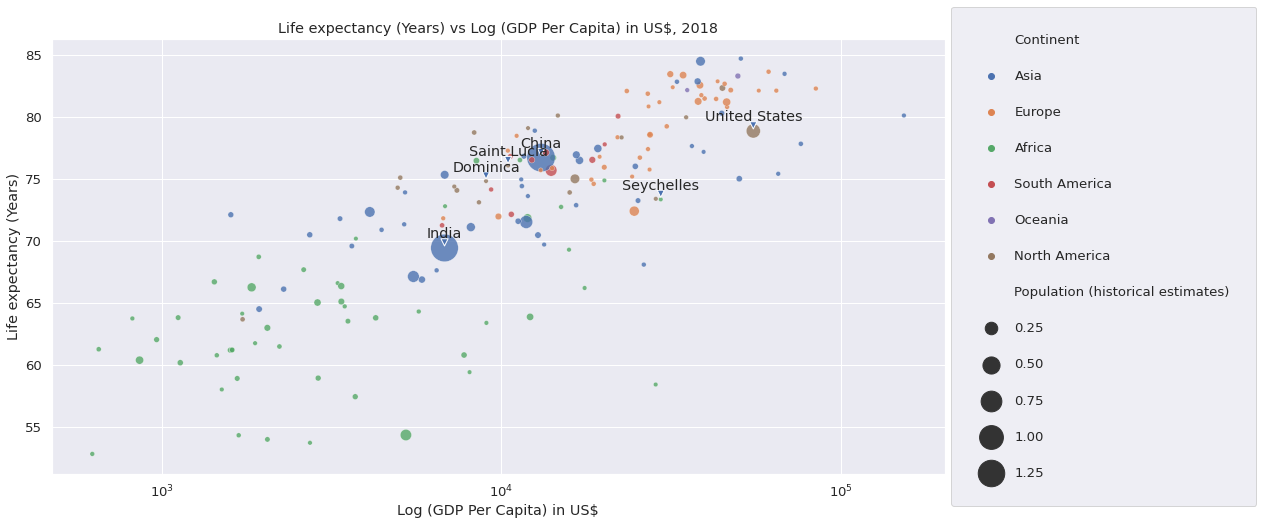

In [22]:
# set figure size
plt.figure(figsize = (16, 8))

# create scatter plot
sns.scatterplot(
    data = df_2018, 
    x = "GDP per capita", 
    y = "Life expectancy", 
    size = "Population (historical estimates)", 
    hue = "Continent", 
    sizes = (20, 800), 
    alpha = 0.8
)

# log transform the x-axis i.e. GDP per capita
plt.xscale("log")

# add legend
plt.legend(
    bbox_to_anchor = (1, 0.5), 
    loc = 'center left', 
    borderpad = 2, 
    labelspacing = 1.75
)

# annotate labels
for i, label in enumerate(df_2018_lbl["Entity"]):
    plt.annotate(label, # this is the label
                 (list(df_2018_lbl["GDP per capita"])[i], list(df_2018_lbl["Life expectancy"])[i]), # these are the coordinates to position the label
                 textcoords = "offset points", # how to position the text
                 xytext = (0, 10), # distance from text to points (x,y)
                 ha = "center", # horizontal alignment can be left, right or center
                 arrowprops = dict(arrowstyle = "simple"))

# set title
plt.title("Life expectancy (Years) vs Log (GDP Per Capita) in US$, 2018")
# set x-axis label
plt.xlabel("Log (GDP Per Capita) in US$")
# set y-axis label
plt.ylabel("Life expectancy (Years)")

plt.show()

## b. Consider whether the results obtained seem reasonable and discuss what might be the explanation for the results you obtained. [1p] 

> It can be hypothesized that socioeconomic factors influence life expectancy, particularly if we consider, in this case, GDP per capita is the socioeconomic factor and a proxy for the economy or economic growth of the country.

> The figure above shows a moderately strong positive linear relationship between life expectancy and Log(GDP per capita), which seems valid. The greater the Log(GDP per capita), the higher is the life expectancy.

> For instance, a country with higher GDP per capita might have better health care/medical facilities or living standards, directly impacting life expectancy. As observed, African countries have lower GDP per capita, and in general, they do not have better healthcare systems than European countries (which have high GDP per capita). Hence, it might explain the relationship between life expectancy and GDP per capita. However, we remain cautioned that correlation does not imply causation.

## c. Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why. [0.5p] 

We performed several steps before creating the scatterplot. 

* Data Cleaning:
    >   We first investigated missing values, calculated the sum of missing values for each feature and their equivalent percentages.

    > We found that life expectancy had 68.3%, GDP per capita had 66.9%, 145446-annotations had 99.9%, the population had 7.34%, and continents had 99.5% missing values.

    > At this stage, we removed only two columns, 145446-annotations and continents. 145446-annotations was not a useful feature; however, we wanted to use it for the continents column, but having too many missing values caused an issue. This issue was mitigated by finding another dataset from [Our World in Data](https://ourworldindata.org/) website containing information about each country's continent. We, therefore, merged the data on the "Code" column as the key to obtaining the continents for each country.

    > We then drop all rows with missing values in either the "GDP per capita" or the "Life expectancy" column.

    > We found a "World" entity that we removed.

     > We carried out a subsequent missing values analysis and found out only the population column had missing values, but we did not drop any further rows.


* Data Filtering:
    > Next, we wanted to know which year had the most data. We calculated the frequency for each year and found out that the maximum frequency (167) was 27 years had the maximum frequency, but we took the most recent year, 2018. So, we then filtered the dataset for the year 2018.

    > Another missing values analysis was carried out, and we found no missing values; hence the data was ready to be plotted.


* Creating Scatter Plot
    > For the scatterplot, we improved the aesthetics using the seaborn package. 

    > For each point, the size was determined by the country's population and the colour by the country's continent. 

    > A histogram was plotted for GDP per capita to determine its distribution, which was rightly skewed. Hence we performed a log transformation on the latter to improve its interpretability.

    > We manually added annotations for countries, and not all could be added since it would look messy and unreadable. The top 3 countries having the highest and lowest populations were annotated.

## d. Which countries have a life expectancy higher than one standard deviation above the mean? [0.5p] 

In [23]:
# Calculate mean and sd
mean_lexp = df_2018["Life expectancy"].mean()
sd_lexp = df_2018["Life expectancy"].std()

# Filter countries with life expectancy > 1 * sd + mean
df_1_sd = df_2018[df_2018["Life expectancy"] > sd_lexp + mean_lexp][["Entity", "Life expectancy"]]

# Sort the countries by life expectancy
df_1_sd = df_1_sd.sort_values(by = "Life expectancy", ascending = False).reset_index(drop = True)
df_1_sd

,Entity,Life expectancy
0,Hong Kong,84.687
1,Japan,84.470
2,Switzerland,83.630
3,Singapore,83.458
4,Spain,83.433
5,Italy,83.352
6,Australia,83.281
7,Iceland,82.855
8,South Korea,82.846
9,Israel,82.819


## e. Which countries have high life expectancy but have low GDP?

> As we saw before, our data is positively skewed and does not follow a normal distribution; thus, we decided to use the third quartile/first quartile to measure high/low values of life expectancy, GDP and GDP per capita.

> Initially, we took the mean and one standard deviation above the mean to be considered high GDP and the mean and standard deviation below the mean to be considered low GDP. This, in turn, gave no results since GDP is skewed to the right because our consideration of low GDP gave negative values which do not exist. Also, it would no more be approximately the 68th percentile since it does not follow a normal distribution.

> Quartiles, interquartile range and median are not susceptible to outliers. The lower bound of the interquartile range represents the first quartile, and the upper bound of the interquartile range represents the third quartile. It encapsulates 50% of our data, so we considered anything outside this range as high or low values.

> Hence, all points below the first quartile are considered low values and above the third quartile as high values.

In [24]:
# calcuate gdp and add as column
df_2018["GDP"] = df_2018["GDP per capita"] * df_2018["Population (historical estimates)"]

In [25]:
# calculate quartiles for life expectancy and gdp
high_life_exp, low_life_exp = np.percentile(df_2018["Life expectancy"], [75 ,25])
high_gdp, low_gdp = np.percentile(df_2018["GDP"], [75 ,25])

In [26]:
df_2018[(df_2018["Life expectancy"] > high_life_exp) & (df_2018["GDP"] < low_gdp)][["Entity", "Life expectancy", "GDP"]].reset_index(drop=True)

,Entity,Life expectancy,GDP
0,Albania,78.458,3.201037e+10
1,Barbados,79.081,3.438300e+09
2,Cyprus,80.828,3.232939e+10
3,Iceland,82.855,1.462628e+10
4,Malta,82.376,1.406886e+10


> We can see that the above 5 countries have high life expectancy but have low GDP.

## f. Does every strong economy (normally indicated by GDP) have high life expectancy?

To answer this question, we can try to find counterexamples where countries with a strong economy (high GDP) have low life expectancy.

In [27]:
df_2018[(df_2018["Life expectancy"] < low_life_exp) & (df_2018["GDP"] > high_gdp)][["Entity", "Life expectancy", "GDP"]].reset_index(drop = True)

,Entity,Life expectancy,GDP
0,Nigeria,54.332,1.025925e+12
1,South Africa,63.857,7.030919e+11


> From the above table, we can see countries with high GDP but low life expectancy. Hence, we cannot conclude that every country with a strong economy has a high life expectancy.

## g. Related to question f, what would happen if you use GDP per capita as an indicator of strong economy? Explain the results you obtained, and discuss any insights you get from comparing the results of g and f.

In [28]:
# calculate median for gdp per capita
high_gdp_pc = np.percentile(df_2018["GDP per capita"], 75)

In [29]:
df_2018[(df_2018["Life expectancy"] < low_life_exp) & (df_2018["GDP per capita"] > high_gdp_pc)][["Entity", "Life expectancy", "GDP per capita"]].reset_index(drop=True)

,Entity,Life expectancy,GDP per capita
0,Equatorial Guinea,58.402,28528.953


> We get to the same conclusions if we consider GDP per capita to measure economic strength as before in 1 (f). However, there are some key differences.

> We get only one country if we consider GDP per capita to measure economic strength. GDP per capita is a better measure of the economy than GDP. For instance, India has a high GDP, but it has a lower GDP per capita because of its high population. On the other extreme, Luxembourg does not have a relatively high GDP, but with its small population, its GDP per capita is one of the highest. This is an essential aspect since, according to Investopedia, "At its most basic interpretation, per capita GDP shows how much economic production value can be attributed to each individual citizen", which means that a high GDP per capita can show how much wealth it can attribute to each person and therefore higher the value, the better would be the standard of living.

# 2. Download some other data sets, e.g. related to happiness and life satisfaction, trust, corruption, etc.

For this task, we have chosen three new datasets:

1. Human Development Index (HDI) for each country
2. Corruption Perception Index (CPI) for each country
3. Self reported interpersonal trust level for each country

Since we only have interpersonal trust data for only 2014 we will only focus on this year.

## LOADING NEW DATASETS

In [30]:
# load Human Development Index (HDI) dataset
df_hdi = pd.read_csv("data/human-development-index.csv")
df_hdi.head()

,Entity,Code,Year,Human Development Index (UNDP)
0,Afghanistan,AFG,1980,0.228
1,Afghanistan,AFG,1985,0.273
2,Afghanistan,AFG,2002,0.373
3,Afghanistan,AFG,2003,0.383
4,Afghanistan,AFG,2004,0.398


In [31]:
# load Corruption Perception Index (CPI) dataset
df_cpi = pd.read_csv("data/TI-corruption-perception-index.csv")
df_cpi.head()

,Entity,Code,Year,Corruption Perception Index - Transparency International (2018)
0,Afghanistan,AFG,2012,8
1,Afghanistan,AFG,2013,8
2,Afghanistan,AFG,2014,12
3,Afghanistan,AFG,2015,11
4,Afghanistan,AFG,2016,15


In [32]:
# load Self Reported Trust dataset
df_trust = pd.read_csv("data/self-reported-trust-attitudes.csv")
df_trust.head()

,Entity,Code,Year,Trust in others (World Values Survey (2014))
0,Albania,ALB,1998,24.32432
1,Albania,ALB,2004,23.20000
2,Algeria,DZA,2004,10.76443
3,Algeria,DZA,2014,17.92863
4,Andorra,AND,2009,20.66199


## DATA PREPROCESSING

### HDI DATASET

In [33]:
# check for missing values
df_hdi.isnull().sum()

Entity                             0
Code                              28
Year                               0
Human Development Index (UNDP)     0
dtype: int64

In [34]:
# remove all rows with missing values
df_hdi = df_hdi.dropna()

In [35]:
# check all unique countries in the dataset
df_hdi.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',

### CPI DATASET

In [36]:
# check for missing values
df_cpi.isnull().sum()

Entity                                                             0
Code                                                               0
Year                                                               0
Corruption Perception Index - Transparency International (2018)    0
dtype: int64

In [37]:
# check all unique countries in the dataset
df_cpi.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Icela

### TRUST DATASET

In [38]:
# check for missing values
df_trust.isnull().sum()

Entity                                          0
Code                                            0
Year                                            0
Trust in others (World Values Survey (2014))    0
dtype: int64

In [39]:
# check all unique countries in the dataset
df_trust.Entity.unique()

array(['Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia',
       'Australia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czechia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany',
       'Ghana', 'Guatemala', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Malaysia', 'Mali', 'Mexico', 'Moldova', 'Montenegro', 'Morocco',
       'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia',
       'Norway', 'Pakistan', 'Palestine', 'Peru', 'Philippines', 'Poland',
       'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Saudi Arabia', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       '

In [40]:
# merge the new datasets and add continent
df_merged = df_hdi.merge(df_cpi, on = ["Entity", "Code", "Year"]).merge(df_trust, on = ["Entity", "Code", "Year"])
df_merged = df_merged.merge(df_continents, on=["Code"])
df_merged.head()

,Entity,Code,Year,Human Development Index (UNDP),Corruption Perception Index - Transparency International (2018),Trust in others (World Values Survey (2014)),Continent
0,Algeria,DZA,2014,0.747,36,17.92863,Africa
1,Argentina,ARG,2014,0.820,34,22.64706,South America
2,Armenia,ARM,2014,0.745,37,10.01821,Asia
3,Australia,AUS,2014,0.933,80,54.43383,Oceania
4,Azerbaijan,AZE,2014,0.758,29,16.16766,Asia


In [41]:
df_merged.rename(columns={"Human Development Index (UNDP)": "HDI", "Corruption Perception Index - Transparency International (2018)": "CPI", "Trust in others (World Values Survey (2014))": "Trust"}, inplace=True)
df_merged.head()

,Entity,Code,Year,HDI,CPI,Trust,Continent
0,Algeria,DZA,2014,0.747,36,17.92863,Africa
1,Argentina,ARG,2014,0.820,34,22.64706,South America
2,Armenia,ARM,2014,0.745,37,10.01821,Asia
3,Australia,AUS,2014,0.933,80,54.43383,Oceania
4,Azerbaijan,AZE,2014,0.758,29,16.16766,Asia


## a. Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data. [2.5p]

## b. Discuss any observations that you make, or insights obtained, from the data visualisations. [2p] 

Our initial hypothesis:

- The higher the HDI the lower the corruption
- The higer the HDI the higher the percentage of people who trust others
- The higher the corruption the lower the percentage of people who trust others

The questions are posed as:

1. How is HDI and corruption related?
2. How is HDI and trust related?
3. How is corruption and trust related?

Below, we will plot the data to answer our questions.

### Human Development Index (HDI) vs Corruption Perception Index (CPI)

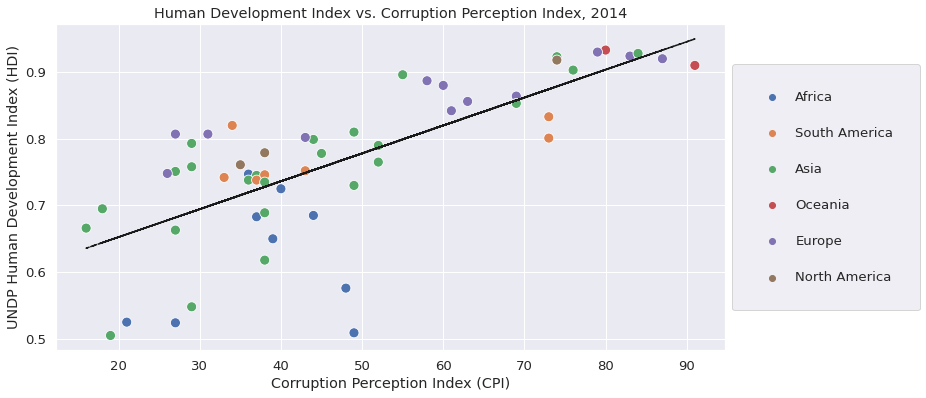

In [42]:
# set figure size
plt.figure(figsize = (12, 6))

# create scatter plot
sns.scatterplot(
    data = df_merged, 
    x = "CPI", 
    y = "HDI",
    s = 100,
    hue = "Continent"
)

trendline = np.polyfit(df_merged["CPI"], df_merged["HDI"], 1)
p = np.poly1d(trendline)
plt.plot(df_merged["CPI"], p(df_merged["CPI"]), "k--")


# add legend
plt.legend(
    bbox_to_anchor=(1, 0.5), 
    loc = 'center left', 
    borderpad = 2, 
    labelspacing = 1.75
)

# set title
plt.title("Human Development Index vs. Corruption Perception Index, 2014")
# set x-axis label
plt.xlabel("Corruption Perception Index (CPI)")
# set y-axis label
plt.ylabel("UNDP Human Development Index (HDI)")

plt.show()

> The above graph depicts the cross-country association between development (as defined by the UNDP Human Development Index) and corruption (as measured by Transparency International's Corruption Perception Index).

> As we can see, countries with higher Corruption Perception Index scores tend to have higher Human Development Index scores. Meaning countries perceived as less corrupt are more developed.

> We see that points for the countries with higher corruption (lower CPI scores) are more scattered (i.e. more variance) than for one with less corruption. Thus, our above conclusion is more accurate for less corrupt countries.

### Human Development Index (HDI) vs Self Reported Trust

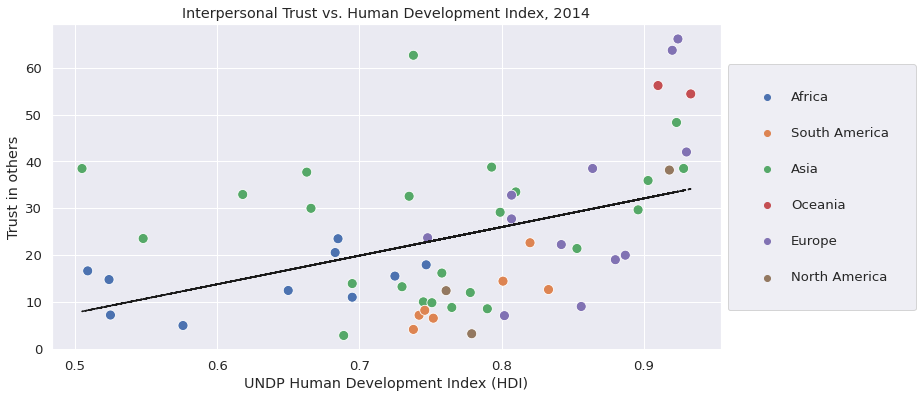

In [43]:
# set figure size
plt.figure(figsize = (12, 6))

# create scatter plot
sns.scatterplot(
    data = df_merged, 
    x = "HDI", 
    y = "Trust",
    s = 100,
    hue = "Continent"
)

trendline = np.polyfit(df_merged["HDI"], df_merged["Trust"], 1)
p = np.poly1d(trendline)
plt.plot(df_merged["HDI"], p(df_merged["HDI"]), "k--")


# add legend
plt.legend(
    bbox_to_anchor=(1, 0.5), 
    loc = 'center left', 
    borderpad = 2, 
    labelspacing = 1.75
)

# set title
plt.title("Interpersonal Trust vs. Human Development Index, 2014")
# set x-axis label
plt.xlabel("UNDP Human Development Index (HDI)")
# set y-axis label
plt.ylabel("Trust in others")

plt.show()

> The above graph depicts the relationship between development (as defined by the UNDP Human Development Index) and self reported interpersonal trust.

> We can see, the people living in countries with higher Human Development Index scores also have more trust. In general, this is true for countries in Asia and Africa. However, despite an increase in HDI scores for South American countries, the trust remains fairly the same and relatively low.

### Corruption Perception Index (CPI) vs Self Reported Trust

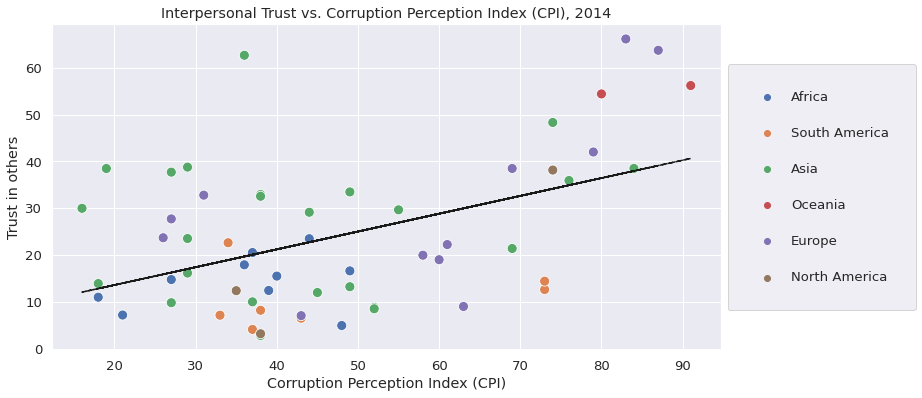

In [44]:
# set figure size
plt.figure(figsize = (12, 6))

# create scatter plot
sns.scatterplot(
    data = df_merged, 
    x = "CPI", 
    y = "Trust",
    s = 100,
    hue = "Continent"
)

trendline = np.polyfit(df_merged["CPI"], df_merged["Trust"], 1)
p = np.poly1d(trendline)
plt.plot(df_merged["CPI"], p(df_merged["CPI"]), "k--")


# add legend
plt.legend(
    bbox_to_anchor=(1, 0.5), 
    loc = 'center left', 
    borderpad = 2, 
    labelspacing = 1.75
)

# set title
plt.title("Interpersonal Trust vs. Corruption Perception Index (CPI), 2014")
# set x-axis label
plt.xlabel("Corruption Perception Index (CPI)")
# set y-axis label
plt.ylabel("Trust in others")

plt.show()

> The above graph shows the relationship between self-reported interpersonal trust and Corruption Perception Index(CPI). 

> There is a moderate relationship between interpersonal trust and Corruption Perception Index(CPI); the less corrupted the countries are (higher Corruption Perception Index), the more trust they have in each other.

> In general, continents such as Asia, Europe, North America follow this relationship. However, for South American countries and, to some extent, African countries, the trust remains fairly the same and relatively low despite the increase in CPI scores.